In [54]:
import statsmodels.stats.power as power
from statsmodels.stats.gof import chisquare_effectsize
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# E

In [55]:
# the idea here is that environment plays a roll in disease risk

-7.921244560173434 0.020000992402563506
P[D|novar,noE]= 0.0003628186466100701 P[D|novar,E]= 0.019431356805043397
-6.313729487324408 0.02000024536439258
P[D|novar,noE]= 0.0018079907837723356 P[D|novar,E]= 0.08999225598825676
-6.072230017501524 0.020000236840725622
P[D|novar,noE]= 0.0023007194797011565 P[D|novar,E]= 0.11182536041628514
-5.877940603720701 0.020000333202349386
P[D|novar,noE]= 0.0027927256172805186 P[D|novar,E]= 0.13262559917157973
-5.723788453656683 0.02000085772268258
P[D|novar,noE]= 0.0032566688311142715 P[D|novar,E]= 0.15138383022030777
-7.921244560173434 0.020000992402563506
P[D|novar,noE]= 0.0003628186466100701 P[D|novar,E]= 0.019431356805043397
-7.0935724380277225 0.02000093171097474
P[D|novar,noE]= 0.0008297363826961725 P[D|novar,E]= 0.006098638380320177
-6.958764972670725 0.020000648953246217
P[D|novar,noE]= 0.0009493673041172169 P[D|novar,E]= 0.004240751682495915
-6.852947906277544 0.020000526664839816
P[D|novar,noE]= 0.001055222445080684 P[D|novar,E]= 0.002863200

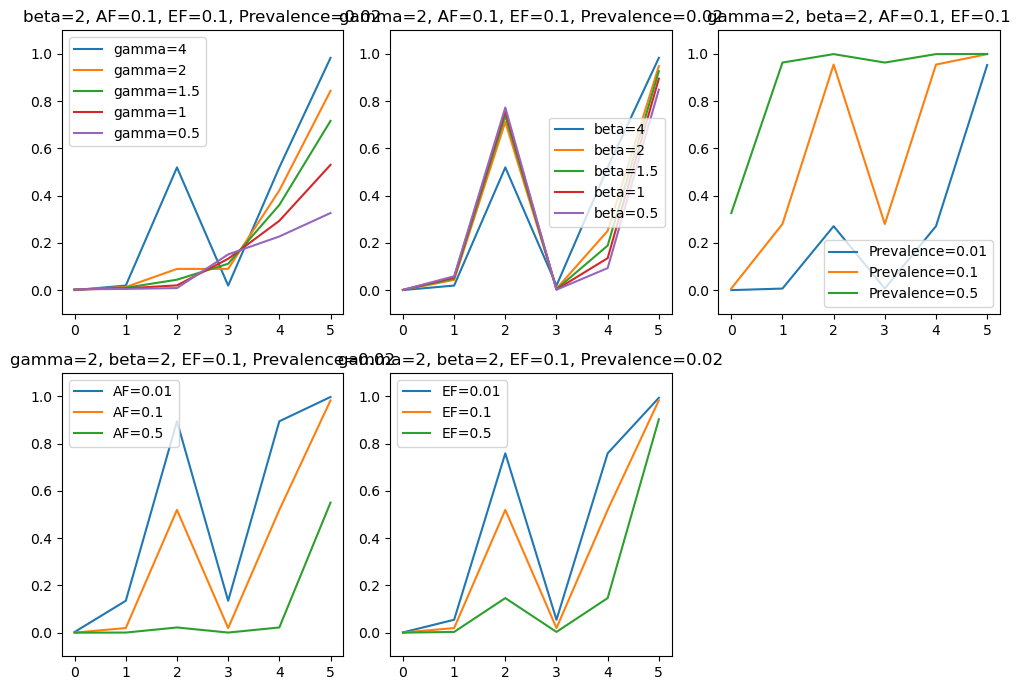

In [56]:
# Genetic Relative Risk

# if you have one of the rare variants, your chance of getting D is gamma-times more than usual
# this doesn't work as we consider multiple variants (and actually doesn't work in the original case if cgamma^2>1)


class P_D():
    def __init__(self, gamma, beta, prevalence, af, ef):
        self.gamma = gamma
        self.beta = beta
        self.p = prevalence
        self.a = af
        self.e = ef
        self.x = np.array([0, 1, 2, 0, 1, 2])
        self.y = np.array([0, 0, 0, 1, 1, 1])
        
        # chose x_0 to get desired overall disease prevalence
        q = np.array([(1-ef)*(1-af)**2, (1-ef)*2*af*(1-af), (1-ef)*af**2, 
                          ef*(1-af)**2, ef*2*af*(1-af), ef*af**2])
        self.c = 0
        rr = self()
        while np.abs(np.sum(q*rr)-self.p)>10**-6:
        #for _ in range(10):
            f_x = np.sum(q*rr)-self.p
            f_prime_x = np.sum(q*rr*(1-q*rr))
            self.c = self.c - f_x/f_prime_x
            #print(f_x, f_prime_x, self.c)
            rr = self()
        print(self.c, np.sum(q*rr))
        print('P[D|novar,noE]=', self()[0], 'P[D|novar,E]=', self()[3])
        self.p = np.sum(q*rr)
        
    def __call__(self):
        return 1/(1+np.exp(-self.gamma*self.x-self.beta*self.y-self.c))

gamma, beta, p = 4, 4, 0.02
af, ef = 0.1, 0.1

plt.figure(figsize=(10, 7))
plt.subplot(2, 3, 1)
plt.plot(np.arange(6), P_D(4, beta, p, af, ef)(), label='gamma=4')
plt.plot(np.arange(6), P_D(2, beta, p, af, ef)(), label='gamma=2')
plt.plot(np.arange(6), P_D(1.5, beta, p, af, ef)(), label='gamma=1.5')
plt.plot(np.arange(6), P_D(1, beta, p, af, ef)(), label='gamma=1')
plt.plot(np.arange(6), P_D(0.5, beta, p, af, ef)(), label='gamma=0.5')
plt.title('beta=2, AF=0.1, EF=0.1, Prevalence=0.02')
plt.ylim([-0.1, 1.1])
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(np.arange(6), P_D(gamma, 4, p, af, ef)(), label='beta=4')
plt.plot(np.arange(6), P_D(gamma, 2, p, af, ef)(), label='beta=2')
plt.plot(np.arange(6), P_D(gamma, 1.5, p, af, ef)(), label='beta=1.5')
plt.plot(np.arange(6), P_D(gamma, 1, p, af, ef)(), label='beta=1')
plt.plot(np.arange(6), P_D(gamma, 0.5, p, af, ef)(), label='beta=0.5')
plt.ylim([-0.1, 1.1])
plt.title('gamma=2, AF=0.1, EF=0.1, Prevalence=0.02')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(np.arange(6), P_D(gamma, beta, 0.01, af, ef)(), label='Prevalence=0.01')
plt.plot(np.arange(6), P_D(gamma, beta, 0.1, af, ef)(), label='Prevalence=0.1')
plt.plot(np.arange(6), P_D(gamma, beta, 0.5, af, ef)(), label='Prevalence=0.5')
plt.ylim([-0.1, 1.1])
plt.title('gamma=2, beta=2, AF=0.1, EF=0.1')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(np.arange(6), P_D(gamma, beta, p, 0.01, ef)(), label='AF=0.01')
plt.plot(np.arange(6), P_D(gamma, beta, p, 0.1, ef)(), label='AF=0.1')
plt.plot(np.arange(6), P_D(gamma, beta, p, 0.5, ef)(), label='AF=0.5')
plt.ylim([-0.1, 1.1])
plt.title('gamma=2, beta=2, EF=0.1, Prevalence=0.02')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(np.arange(6), P_D(gamma, beta, p, af, 0.01)(), label='EF=0.01')
plt.plot(np.arange(6), P_D(gamma, beta, p, af, 0.1)(), label='EF=0.1')
plt.plot(np.arange(6), P_D(gamma, beta, p, af, 0.5)(), label='EF=0.5')
plt.ylim([-0.1, 1.1])
plt.title('gamma=2, beta=2, EF=0.1, Prevalence=0.02')
plt.legend()

plt.tight_layout()

plt.show()

In [110]:
def assoc_power_simulation(p_d, num_samples, num_trials=10000):
    a = p_d.a
    e = p_d.e
    p = p_d.p
    gamma = p_d.gamma
    beta = p_d.beta
    
    rr = p_d()
    
    p_g2_givD = ((1-e)*rr[2] + e*rr[5])*a**2/p
    p_g1_givD = ((1-e)*rr[1] + e*rr[4])*2*a*(1-a)/p
    p_g0_givD = ((1-e)*rr[0] + e*rr[3])*(1-a)**2/p
        
    # and P[G_this_site=x|~D] = P[~D|G=x]*P[G=x]/P[~D]
    p_g2_givnoD = (1-((1-e)*rr[2] + e*rr[5]))*a**2/(1-p)
    p_g1_givnoD = (1-((1-e)*rr[1] + e*rr[4]))*2*a*(1-a)/(1-p)
    p_g0_givnoD = (1-((1-e)*rr[0] + e*rr[3]))*(1-a)**2/(1-p)

    gencounts_D = np.random.multinomial(num_samples, [p_g0_givD, p_g1_givD, p_g2_givD], size=num_trials)
    gencounts_noD = np.random.multinomial(num_samples, [p_g0_givnoD, p_g1_givnoD, p_g2_givnoD], size=num_trials)
    
    allelecount_D = gencounts_D[:, 1]+2*gencounts_D[:, 2]
    allelecount_noD = gencounts_noD[:, 1]+2*gencounts_noD[:, 2]
    
    has_data = allelecount_D+allelecount_noD>0
    power = np.sum(stats.hypergeom.sf(allelecount_D[has_data], 4*num_samples, (allelecount_D+allelecount_noD)[has_data], 2*num_samples)<=0.05)/num_trials
    return power

    
def num_samples_by_power_simulation(p_d, power_f, power=0.9):
    min_sample_size = 1
    min_power = power_f(p_d, min_sample_size)
    max_sample_size, max_power = None, None
        
    while max_power is None:
    #for _ in range(10):
        current_sample_size = min_sample_size*10
        if current_sample_size>10**9:
            return None, None
        
        current_power = power_f(p_d, current_sample_size)
        #print('find max', current_sample_size, current_power)
        if current_power > power:
            max_sample_size, max_power = current_sample_size, current_power
        elif current_power < power:
            min_sample_size, min_power = current_sample_size, current_power
        else:
            max_sample_size, max_power = current_sample_size, current_power
            min_sample_size, min_power = current_sample_size, current_power
            
    while max_sample_size - min_sample_size > 1:
    #for _ in range(10):
        current_sample_size = int(math.floor((max_sample_size - min_sample_size)/2)+min_sample_size)
        current_power = power_f(p_d, current_sample_size)
        #print('find', min_sample_size, max_sample_size, current_sample_size, current_power)
        if current_power > power:
            max_sample_size, max_power = current_sample_size, current_power
        elif current_power < power:
            min_sample_size, min_power = current_sample_size, current_power
        else:
            max_sample_size, max_power = current_sample_size, current_power
            min_sample_size, min_power = current_sample_size, current_power
    return max_sample_size, max_power
        


In [111]:
def concordant_sibpair_power_simulation(p_d, num_samples, num_trials=10000):
    a = p_d.a
    e = p_d.e
    p = p_d.p
    gamma = p_d.gamma
    beta = p_d.beta
        
    rr = p_d()
    
    # P[D=2|IBD=2]
    p_D2_givIBD2 = a**2*((1-e)*rr[2]**2 + e*rr[5]**2) + \
                   2*a*(1-a)*((1-e)*rr[1]**2 + e*rr[4]**2) + \
                   (1-a)**2*((1-e)*rr[0]**2 + e*rr[3]**2)
        
    # P[D=2|IBD=1]
    p_D2_givIBD1 = a**3*((1-e)*rr[2]**2 + e*rr[5]**2) + \
                   2*a**2*(1-a)*((1-e)*rr[2]*rr[1] + e*rr[5]*rr[4]) + \
                   a*(1-a)**2*((1-e)*rr[1]**2 + e*rr[4]**2) + \
                   (1-a)*a**2*((1-e)*rr[1]**2 + e*rr[4]**2) + \
                   2*(1-a)**2*a*((1-e)*rr[1]*rr[0] + e*rr[4]*rr[3]) + \
                   (1-a)**3*((1-e)*rr[0]**2 + e*rr[3]**2)
    
    # P[D=2|IBD=0]
    p_D2_givIBD0 = a**4*((1-e)*rr[2]**2 + e*rr[5]**2) + \
                   4*a**3*(1-a)*((1-e)*rr[2]*rr[1] + e*rr[5]*rr[4]) + \
                   4*a**2*(1-a)**2*((1-e)*rr[1]**2 + e*rr[4]**2) + \
                   2*a**2*(1-a)**2*((1-e)*rr[2]*rr[0] + e*rr[5]*rr[3]) + \
                   4*a*(1-a)**3*((1-e)*rr[1]*rr[0] + e*rr[4]*rr[3]) + \
                   (1-a)**4*((1-e)*rr[0]**2 + e*rr[3]**2)
            
    p_D2 = p_D2_givIBD2*0.25 + p_D2_givIBD1*0.5 + p_D2_givIBD0*0.25

    p_IBD2_givD2 = p_D2_givIBD2*0.25/p_D2
    p_IBD1_givD2 = p_D2_givIBD1*0.5/p_D2
    p_IBD0_givD2 = p_D2_givIBD0*0.25/p_D2
    
    ibd = np.random.multinomial(num_samples, [p_IBD0_givD2, p_IBD1_givD2, p_IBD2_givD2], size=num_trials)
    
    power = np.sum(stats.binom.sf(ibd[:, 1]+2*ibd[:, 2], 2*num_samples, 0.5)<=0.05)/num_trials
    return power

In [112]:
def discordant_sibpair_power_simulation(p_d, num_samples, num_trials=10000):
    a = p_d.a
    e = p_d.e
    p = p_d.p
    gamma = p_d.gamma
    beta = p_d.beta
        
    rr = p_d()
    
    p_D_givg2 = ((1-e)*rr[2] + e*rr[5])
    p_D_givg1 = ((1-e)*rr[1] + e*rr[4])
    p_D_givg0 = ((1-e)*rr[0] + e*rr[3])

    # P[D=1|IBD=2]
    p_D1_givIBD2 = a**2*((1-e)*rr[2]*(1-rr[2]) + e*rr[5]*(1-rr[5])) + \
                   2*a*(1-a)*((1-e)*rr[1]*(1-rr[1]) + e*rr[4]*(1-rr[4])) + \
                   (1-a)**2*((1-e)*rr[0]*(1-rr[0]) + e*rr[3]*(1-rr[3]))
        
    # P[D=1|IBD=1]
    p_D1_givIBD1 = a**3*((1-e)*rr[2]*(1-rr[2]) + e*rr[5]*(1-rr[5])) + \
                   a**2*(1-a)*((1-e)*rr[2]*(1-rr[1]) + e*rr[5]*(1-rr[4])) + \
                   a**2*(1-a)*((1-e)*rr[1]*(1-rr[2]) + e*rr[4]*(1-rr[5])) + \
                   a*(1-a)**2*((1-e)*rr[1]*(1-rr[1]) + e*rr[4]*(1-rr[4])) + \
                   (1-a)*a**2*((1-e)*rr[1]*(1-rr[1]) + e*rr[4]*(1-rr[4])) + \
                   (1-a)**2*a*((1-e)*rr[1]*(1-rr[0]) + e*rr[4]*(1-rr[3])) + \
                   (1-a)**2*a*((1-e)*rr[0]*(1-rr[1]) + e*rr[3]*(1-rr[4])) + \
                   (1-a)**3*((1-e)*rr[0]*(1-rr[0]) + e*rr[3]*(1-rr[3]))
    
    # P[D=1|IBD=0]
    p_D1_givIBD0 = a**4*((1-e)*rr[2]*(1-rr[2]) + e*rr[5]*(1-rr[5])) + \
                   2*a**3*(1-a)*((1-e)*rr[2]*(1-rr[1]) + e*rr[5]*(1-rr[4])) + \
                   2*a**3*(1-a)*((1-e)*rr[1]*(1-rr[2]) + e*rr[4]*(1-rr[5])) + \
                   4*a**2*(1-a)**2*((1-e)*rr[1]*(1-rr[1]) + e*rr[4]*(1-rr[4])) + \
                   a**2*(1-a)**2*((1-e)*rr[2]*(1-rr[0]) + e*rr[5]*(1-rr[3])) + \
                   a**2*(1-a)**2*((1-e)*rr[0]*(1-rr[2]) + e*rr[3]*(1-rr[5])) + \
                   2*a*(1-a)**3*((1-e)*rr[1]*(1-rr[0]) + e*rr[4]*(1-rr[3])) + \
                   2*a*(1-a)**3*((1-e)*rr[0]*(1-rr[1]) + e*rr[3]*(1-rr[4])) + \
                   (1-a)**4*((1-e)*rr[0]*(1-rr[0]) + e*rr[3]*(1-rr[3]))
            
    p_D1 = p_D1_givIBD2*0.25 + p_D1_givIBD1*0.5 + p_D1_givIBD0*0.25

    p_IBD2_givD1 = p_D1_givIBD2*0.25/p_D1
    p_IBD1_givD1 = p_D1_givIBD1*0.5/p_D1
    p_IBD0_givD1 = p_D1_givIBD0*0.25/p_D1
    
    ibd = np.random.multinomial(num_samples, [p_IBD0_givD1, p_IBD1_givD1, p_IBD2_givD1], size=num_trials)
    
    power = np.sum(stats.binom.cdf(ibd[:, 1]+2*ibd[:, 2], 2*num_samples, 0.5)<=0.05)/num_trials
    return power

In [118]:
gamma = 2 # GRR
beta = 4 # ERR
p = 0.02 # disease prevalence

bins_a = np.hstack((10.0**np.arange(-5, 0, 0.5), [0.5]))
bins_e = [0.001, 0.01, 0.1]

samples_assoc = np.zeros((len(bins_a), len(bins_e)))
samples_sibpair_con = np.zeros((len(bins_a), len(bins_e)))
samples_sibpair_dis = np.zeros((len(bins_a), len(bins_e)))

for i in range(len(bins_a)):
    for j in range(len(bins_e)):
        print('AF', bins_a[i], 'EF', bins_e[j])
        p_d = P_D(gamma, beta, p, bins_a[i], bins_e[j])

        samples_assoc[i, j] = num_samples_by_power_simulation(p_d, assoc_power_simulation)[0]
        samples_sibpair_con[i, j] = num_samples_by_power_simulation(p_d, concordant_sibpair_power_simulation)[0]
        samples_sibpair_dis[i, j] = num_samples_by_power_simulation(p_d, discordant_sibpair_power_simulation)[0]

AF 1e-05 EF 0.001
-3.9177764468953913 0.02000077196082737
P[D|novar,noE]= 0.01949754772144484 P[D|novar,E]= 0.5205443150625212
AF 1e-05 EF 0.01
-4.149507955344487 0.02000076784694435
P[D|novar,noE]= 0.015527276268849503 P[D|novar,E]= 0.4626924787192453
AF 1e-05 EF 0.1
-5.606672573455612 0.020000224647381725
P[D|novar,noE]= 0.003659828044476427 P[D|novar,E]= 0.16705109563861634
AF 3.1622776601683795e-05 EF 0.001
-3.9180195244998623 0.02000077654613809
P[D|novar,noE]= 0.019492901253991966 P[D|novar,E]= 0.5204836479542315
AF 3.1622776601683795e-05 EF 0.01
-4.1497336125226445 0.02000076900102155
P[D|novar,noE]= 0.01552382720969696 P[D|novar,E]= 0.462636378978433
AF 3.1622776601683795e-05 EF 0.1
-5.606832212288603 0.0200002251269197
P[D|novar,noE]= 0.0036592459781768305 P[D|novar,E]= 0.16702888386951373
AF 0.0001 EF 0.001
-3.918787996002469 0.020000791161609698
P[D|novar,noE]= 0.019478218935707416 P[D|novar,E]= 0.5202918495040453
AF 0.0001 EF 0.01
-4.150447022684994 0.020000772658487147
P[D

[1.00000000e-05 3.16227766e-05 1.00000000e-04 3.16227766e-04
 1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 5.00000000e-01]


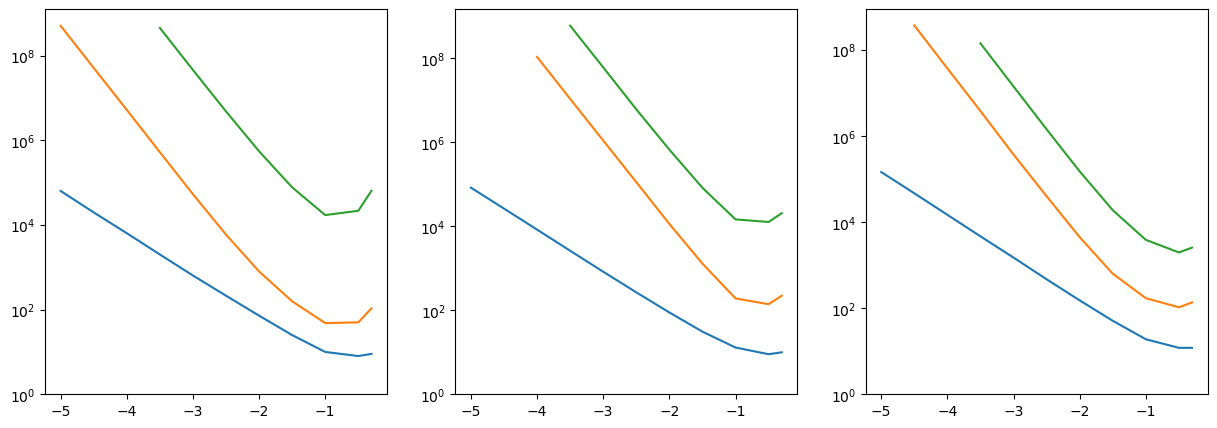

In [119]:
print(bins_a)

plt.figure(figsize=(15, 5))

for i in range(len(bins_e)):
    plt.subplot(1, len(bins_e), i+1)
    plt.plot(np.log10(bins_a), np.log10(samples_assoc[:, i]))
    plt.plot(np.log10(bins_a), np.log10(samples_sibpair_con[:, i]))
    plt.plot(np.log10(bins_a), np.log10(samples_sibpair_dis[:, i]))
    #plt.xticks(np.arange(-5, 0), ['$10^{%d}$' % i for i in np.arange(-5, 0)])
    plt.yticks(np.arange(0, 10, 2), ['$10^{%d}$' % i for i in np.arange(0, 10, 2)])


plt.show()

# attempt 1

In [83]:
# Genetic Relative Risk

gamma = 0.5 # GRR
beta = 10 # ERR (environmental relative risk)
p = 0.02 # disease prevalence

# Power for association test
def get_samples_assoc(a, e):
    c = p/(a**2*e*gamma**2*beta + 2*a*(1-a)*e*gamma*beta + (1-a)**2*e*beta \
        +  a**2*(1-e)*gamma**2 + 2*a*(1-a)*(1-e)*gamma + (1-a)**2*(1-e))
    
    tind_power = power.TTestIndPower()

    p_g2_givD = (gamma**2*beta*c*e + gamma**2*c*(1-e))*a**2/p # P[G=2|D] = (P[D|G=2, E]*P[E] + P[D|G=2, ~E]*P[~E])*P[G=2]/P[D]
    p_g1_givD = (gamma*beta*c*e + gamma*c*(1-e))*2*a*(1-a)/p # P[G=1|D] = (P[D|G=1, E]*P[E] + P[D|G=1, ~E]*P[~E])*P[G=1]/P[D]
    p_g0_givD = (beta*c*e + c*(1-e))*(1-a)**2/p # P[G=0|D] = (P[D|G=0, E]*P[E] + P[D|G=0, ~E]*P[~E])*P[G=0]/P[D]

    p_g2_givnoD = ((1-gamma**2*beta*c)*e + (1-gamma**2*c)*(1-e))*a**2/(1-p) # P[G=2|~D] = (P[~D|G=2, E]*P[E] + P[~D|G=2, ~E]*P[~E])*P[G=2]/P[~D]
    p_g1_givnoD = ((1-gamma*beta*c)*e + (1-gamma*c)*(1-e))*2*a*(1-a)/(1-p) # P[G=1|~D] = (P[~D|G=1, E]*P[E] + P[~D|G=1, ~E]*P[~E])*P[G=1]/P[~D]
    p_g0_givnoD = ((1-beta*c)*e + (1-c)*(1-e))*(1-a)**2/(1-p) # P[G=0|~D] = (P[~D|G=0, E]*P[E] + P[~D|G=0, ~E]*P[~E])*P[G=0]/P[~D]

    m1 = 2*p_g2_givD + p_g1_givD # E[G|D]
    m2 = 2*p_g2_givnoD + p_g1_givnoD # E[G|~D]
    std1 = np.sqrt(p_g2_givD*(2-m1)**2 + p_g1_givD*(1-m1)**2) + p_g0_givD*m1**2
    std2 = np.sqrt(p_g2_givnoD*(2-m2)**2 + p_g1_givnoD*(1-m2)**2 + p_g0_givnoD*m2**2)
    return tind_power.solve_power(abs(m1-m2)/std2, nobs1=None, alpha=0.05, power=0.9, ratio=1)

# Power for sibpair test
def get_samples_sibpair(a, e):
    c = p/(a**2*e*gamma**2*beta + 2*a*(1-a)*e*gamma*beta + (1-a)**2*e*beta \
        +  a**2*(1-e)*gamma**2 + 2*a*(1-a)*(1-e)*gamma + (1-a)**2*(1-e))
    
    t_power = power.TTestPower()

    p_D2_givIBD2_E = c**2*beta**2*(a**2*gamma**4 + 2*a*(1-a)*gamma**2 + (1-a)**2) # P[D=2|IBD=2, E]
    p_D2_givIBD1_E = c**2*beta**2*(a**3*gamma**4 + 2*a**2*(1-a)*gamma**3 + a*(1-a)**2*gamma**2 \
                    + (1-a)*a**2*gamma**2 + 2*(1-a)**2*a*gamma + (1-a)**3) # P[D=2|IBD=1, E]
    p_D2_givIBD0_E = (c*beta*(a**2*gamma**2 + 2*a*(1-a)*gamma + (1-a)**2))**2 # P[D=2|IBD=0, E]
    
    p_D2_givIBD2_noE = c**2*(a**2*gamma**4 + 2*a*(1-a)*gamma**2 + (1-a)**2) # P[D=2|IBD=2, ~E]
    p_D2_givIBD1_noE = c**2*(a**3*gamma**4 + 2*a**2*(1-a)*gamma**3 + a*(1-a)**2*gamma**2 \
                    + (1-a)*a**2*gamma**2 + 2*(1-a)**2*a*gamma + (1-a)**3) # P[D=2|IBD=1, ~E]
    p_D2_givIBD0_noE = (c*(a**2*gamma**2 + 2*a*(1-a)*gamma + (1-a)**2))**2 # P[D=2|IBD=0, ~E]

    p_D2 = p_D2_givIBD2_E*0.25*e + p_D2_givIBD1_E*0.5*e + p_D2_givIBD0_E*0.25*e \
         + p_D2_givIBD2_noE*0.25*(1-e) + p_D2_givIBD1_noE*0.5*(1-e) + p_D2_givIBD0_noE*0.25*(1-e)
    #print('prob of aff-aff sibpair', p_D2)

    p_IBD2_givD2 = (p_D2_givIBD2_E*e + p_D2_givIBD2_noE*(1-e))*0.25/p_D2
    p_IBD1_givD2 = (p_D2_givIBD1_E*e + p_D2_givIBD1_noE*(1-e))*0.5/p_D2
    p_IBD0_givD2 = (p_D2_givIBD0_E*e + p_D2_givIBD0_noE*(1-e))*0.25/p_D2

    m = 2*p_IBD2_givD2 + p_IBD1_givD2
    std = np.sqrt(p_IBD2_givD2*(2-m)**2 + p_IBD1_givD2*(1-m)**2 + p_IBD0_givD2*m**2)

    return t_power.solve_power(abs(m-1)/std, nobs=None, alpha=0.05, power=0.9)


In [84]:
bins_a = np.arange(0, 1, 0.1)
bins_e = np.arange(0, 1, 0.1)

samples_assoc = np.zeros((len(bins_a), len(bins_e)))
samples_sibpair = np.zeros((len(bins_a), len(bins_e)))

for i in range(len(bins_a))[1:]:
    for j in range(len(bins_e))[1:]:
        samples_assoc[i, j] = get_samples_assoc(bins_a[i], bins_e[j])
        try:
            samples_sibpair[i, j] = get_samples_sibpair(bins_a[i], bins_e[j])
        except:
            pass
       

/Users/kelley/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/kelley/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/Users/kelley/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: divide by zero encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/kelley/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: divide by zero encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


/var/folders/hp/72rjd_x140qf9f9d9f4hy40c0000gp/T/ipykernel_37663/438176041.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(samples_assoc), aspect='auto', vmax=3)
/var/folders/hp/72rjd_x140qf9f9d9f4hy40c0000gp/T/ipykernel_37663/438176041.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(samples_sibpair), aspect='auto', vmax=3)
/var/folders/hp/72rjd_x140qf9f9d9f4hy40c0000gp/T/ipykernel_37663/438176041.py:16: RuntimeWarning: divide by zero encountered in log10
  diff = np.log10(samples_assoc)-np.log10(samples_sibpair)
/var/folders/hp/72rjd_x140qf9f9d9f4hy40c0000gp/T/ipykernel_37663/438176041.py:16: RuntimeWarning: invalid value encountered in subtract
  diff = np.log10(samples_assoc)-np.log10(samples_sibpair)


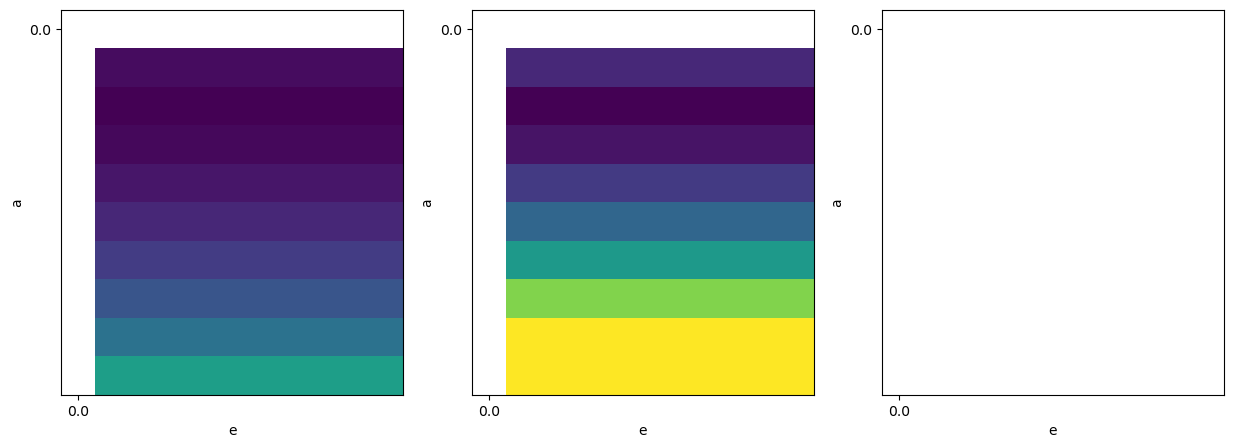

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          21.0555528   21.0555528   21.0555528   21.0555528
   21.0555528   21.0555528   21.0555528   21.0555528   21.0555528 ]
 [  0.          18.32978959  18.32978959  18.32978959  18.32978959
   18.32978959  18.32978959  18.32978959  18.32978959  18.32978959]
 [  0.          19.82371547  19.82371547  19.82371547  19.82371547
   19.82371547  19.82371547  19.82371547  19.82371547  19.82371547]
 [  0.          23.2755282   23.2755282   23.2755282   23.2755282
   23.2755282   23.2755282   23.2755282   23.2755282   23.2755282 ]
 [  0.          28.81224115  28.81224115  28.81224115  28.81224115
   28.81224115  28.81224115  28.81224115  28.81224115  28.81224115]
 [  0.          37.5604638   37.5604638   37.5604638   37.5604638
   37.5604638   37.5604638   37.5604638   37.5604638   37.5604638 ]
 [  0.          52.48113384  52.48113384  52.48113384  52.48113384

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(np.log10(samples_assoc), aspect='auto', vmax=3)
plt.ylabel('a')
plt.xlabel('e')
plt.xticks(np.arange(0, len(bins_e), 10), [str(bins_e[i]) for i in np.arange(0, len(bins_e), 10)])
plt.yticks(np.arange(0, len(bins_a), 10), [str(bins_a[i]) for i in np.arange(0, len(bins_a), 10)])

plt.subplot(1, 3, 2)
plt.imshow(np.log10(samples_sibpair), aspect='auto', vmax=3)
plt.ylabel('a')
plt.xlabel('e')
plt.xticks(np.arange(0, len(bins_e), 10), [str(bins_e[i]) for i in np.arange(0, len(bins_e), 10)])
plt.yticks(np.arange(0, len(bins_a), 10), [str(bins_a[i]) for i in np.arange(0, len(bins_a), 10)])

diff = np.log10(samples_assoc)-np.log10(samples_sibpair)
diff[diff<0] = np.nan

plt.subplot(1, 3, 3)
plt.imshow(diff, aspect='auto', vmax=1)
plt.ylabel('a')
plt.xlabel('e')
plt.xticks(np.arange(0, len(bins_e), 10), [str(bins_e[i]) for i in np.arange(0, len(bins_e), 10)])
plt.yticks(np.arange(0, len(bins_a), 10), [str(bins_a[i]) for i in np.arange(0, len(bins_a), 10)])
plt.show()


In [ ]:
# an independent environmental variable has no impact

# G X E

In [11]:
# Genetic Relative Risk

gamma = 10 # GRR
p = 0.02 # disease prevalence

# Power for association test
def get_samples_assoc(a, e):
    c = p/((1-a)**2*e + 2*gamma*a*(1-a)*e + gamma**2*a**2*e + (1-e)) 
    
    tind_power = power.TTestIndPower()

    p_g2_givD = (c*gamma**2*e + c*(1-e))*a**2/p # P[G=2|D]
    p_g1_givD = (c*gamma*e + c*(1-e))*2*a*(1-a)/p # P[G=1|D]
    p_g0_givD = c*(1-a)**2/p # P[G=0|D]

    p_g2_givnoD = ((1-c*gamma**2)*e + (1-c)*(1-e))*a**2/(1-p) # P[G=2|~D]
    p_g1_givnoD = ((1-c*gamma)*e + (1-c)*(1-e))*2*a*(1-a)/(1-p) # P[G=1|~D]
    p_g0_givnoD = (1-c)*(1-a)**2/(1-p) # P[G=0|~D]

    m1 = 2*p_g2_givD + p_g1_givD # E[G|D]
    m2 = 2*p_g2_givnoD + p_g1_givnoD # E[G|~D]
    std1 = np.sqrt(p_g2_givD*(2-m1)**2 + p_g1_givD*(1-m1)**2) + p_g0_givD*m1**2
    std2 = np.sqrt(p_g2_givnoD*(2-m2)**2 + p_g1_givnoD*(1-m2)**2 + p_g0_givnoD*m2**2)
    return tind_power.solve_power(abs(m1-m2)/std2, nobs1=None, alpha=0.05, power=0.9, ratio=1)

# Power for sibpair test
def get_samples_sibpair(a, e):
    c = p/((1-a)**2*e + 2*gamma*a*(1-a)*e + gamma**2*a**2*e + (1-e)) 
    
    t_power = power.TTestPower()

    p_D2_givIBD2E = c**2*(a**2*gamma**4 + 2*a*(1-a)*gamma**2 + (1-a)**2)
    p_D2_givIBD1E = c**2*(a**3*gamma**4 + 2*a**2*(1-a)*gamma**3 + a*(1-a)**2*gamma**2 \
                    + (1-a)*a**2*gamma**2 + 2*(1-a)**2*a*gamma + (1-a)**3)
    p_D2_givIBD0E = (a**2*c*gamma**2 + 2*a*(1-a)*c*gamma + (1-a)**2*c)**2

    p_D2 = p_D2_givIBD2E*0.25*e + p_D2_givIBD1E*0.5*e + p_D2_givIBD0E*0.25*e + c**2*(1-e)
    #print('prob of aff-aff sibpair', p_D2)

    p_IBD2_givD2 = (p_D2_givIBD2E*e + c**2*(1-e))*0.25/p_D2
    p_IBD1_givD2 = (p_D2_givIBD1E*e + c**2*(1-e))*0.5/p_D2
    p_IBD0_givD2 = (p_D2_givIBD0E*e + c**2*(1-e))*0.25/p_D2

    m = 2*p_IBD2_givD2 + p_IBD1_givD2
    std = np.sqrt(p_IBD2_givD2*(2-m)**2 + p_IBD1_givD2*(1-m)**2 + p_IBD0_givD2*m**2)

    return t_power.solve_power(abs(m-1)/std, nobs=None, alpha=0.05, power=0.9)


In [12]:
bins_a = np.arange(0, 0.5, 0.01)
bins_e = np.arange(0, 0.3, 0.01)

samples_assoc = np.zeros((len(bins_a), len(bins_e)))
samples_sibpair = np.zeros((len(bins_a), len(bins_e)))

for i in range(len(bins_a))[1:]:
    for j in range(len(bins_e))[1:]:
        try:
            samples_assoc[i, j] = get_samples_assoc(bins_a[i], bins_e[j])
        except:
            pass
        try:
            samples_sibpair[i, j] = get_samples_sibpair(bins_a[i], bins_e[j])
        except:
            pass

/var/folders/hp/72rjd_x140qf9f9d9f4hy40c0000gp/T/ipykernel_37663/591447867.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(samples_assoc), aspect='auto', vmax=3)
/var/folders/hp/72rjd_x140qf9f9d9f4hy40c0000gp/T/ipykernel_37663/591447867.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(samples_sibpair), aspect='auto', vmax=3)
/var/folders/hp/72rjd_x140qf9f9d9f4hy40c0000gp/T/ipykernel_37663/591447867.py:16: RuntimeWarning: divide by zero encountered in log10
  diff = np.log10(samples_assoc)-np.log10(samples_sibpair)
/var/folders/hp/72rjd_x140qf9f9d9f4hy40c0000gp/T/ipykernel_37663/591447867.py:16: RuntimeWarning: invalid value encountered in subtract
  diff = np.log10(samples_assoc)-np.log10(samples_sibpair)


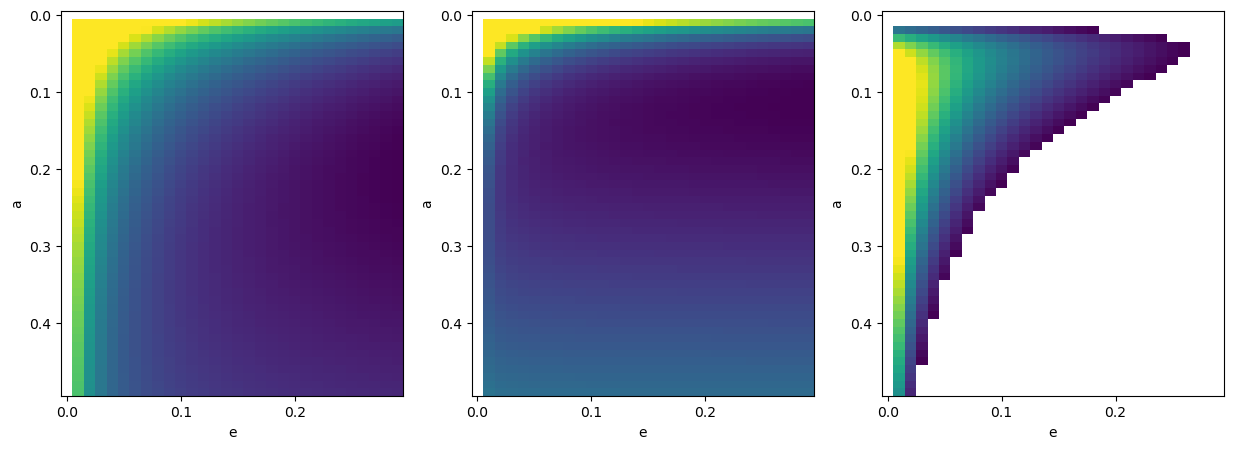

In [15]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(np.log10(samples_assoc), aspect='auto', vmax=3)
plt.ylabel('a')
plt.xlabel('e')
plt.xticks(np.arange(0, len(bins_e), 10), [str(bins_e[i]) for i in np.arange(0, len(bins_e), 10)])
plt.yticks(np.arange(0, len(bins_a), 10), [str(bins_a[i]) for i in np.arange(0, len(bins_a), 10)])

plt.subplot(1, 3, 2)
plt.imshow(np.log10(samples_sibpair), aspect='auto', vmax=3)
plt.ylabel('a')
plt.xlabel('e')
plt.xticks(np.arange(0, len(bins_e), 10), [str(bins_e[i]) for i in np.arange(0, len(bins_e), 10)])
plt.yticks(np.arange(0, len(bins_a), 10), [str(bins_a[i]) for i in np.arange(0, len(bins_a), 10)])

diff = np.log10(samples_assoc)-np.log10(samples_sibpair)
diff[diff<0] = np.nan

plt.subplot(1, 3, 3)
plt.imshow(diff, aspect='auto', vmax=1)
plt.ylabel('a')
plt.xlabel('e')
plt.xticks(np.arange(0, len(bins_e), 10), [str(bins_e[i]) for i in np.arange(0, len(bins_e), 10)])
plt.yticks(np.arange(0, len(bins_a), 10), [str(bins_a[i]) for i in np.arange(0, len(bins_a), 10)])
plt.show()


In [5]:
# if the allele frequency is small ~0.05 OR the environmental prevalence is small, 
# then sibpairs are better; if both are small, it's a lot better
# this is assuming a high GRR (10) and a low disease prevalence (0.02)